In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [6]:
def eucledian(p1, p2):
    dist = ((p1 - p2)**2).sum()
    return dist

In [23]:

def naive(p, q):
    n_p = p.shape[0]
    n_q = q.shape[0]
    p = p.reshape(n_p, 1, -1).repeat(n_q, axis=1)
    q = q.reshape(1, n_q, -1).repeat(n_p, axis=0)
    dist = ((p - q)**2).sum(axis=-1)
    return dist

print(p)
print(q)
naive(p, q)


[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]]
[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


array([[0.36722477, 0.87720924, 0.83037395, 0.35190232, 0.07596501],
       [0.65200778, 0.04453094, 0.45250711, 0.05060288, 0.21654589],
       [0.12712231, 0.56576712, 0.32718459, 0.24900168, 0.05433945],
       [0.45267882, 0.27465432, 0.09935246, 0.39958703, 0.49389096]])

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [3]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [4]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [27]:
def with_indices(p, q):
    ''' fill your code in here...
    '''
    rows, cols = np.indices((p.shape[0], q.shape[0]))
    dist = ((p[rows] - q[cols])**2).sum(axis=-1)
    return dist
    

with_indices(p, q)

array([[0.36722477, 0.87720924, 0.83037395, 0.35190232, 0.07596501],
       [0.65200778, 0.04453094, 0.45250711, 0.05060288, 0.21654589],
       [0.12712231, 0.56576712, 0.32718459, 0.24900168, 0.05433945],
       [0.45267882, 0.27465432, 0.09935246, 0.39958703, 0.49389096]])

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [28]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [29]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [30]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

1.17 ms ± 12 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.45 ms ± 13.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
249 µs ± 515 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.22 ms ± 3.21 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


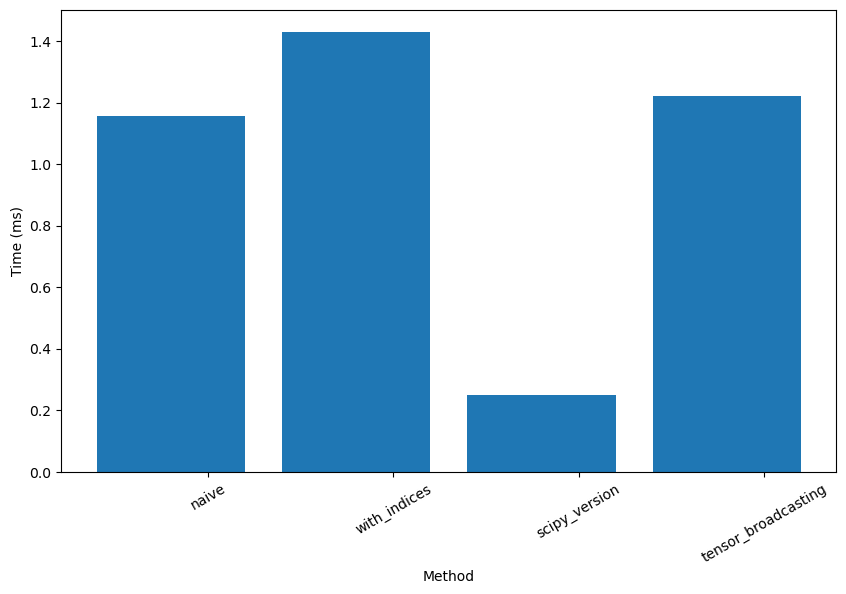

In [31]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()